In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv("D:/Datasets/Diabetes Classification.csv")

In [53]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [54]:
df.shape

(128, 11)

In [55]:
df.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [56]:
cat = df.select_dtypes(include = 'object').columns.tolist()
cat

['Gender',
 'Blood Pressure',
 'Family History of Diabetes',
 'Smoking',
 'Diet',
 'Exercise',
 'Diagnosis']

In [57]:
num = df.select_dtypes(exclude = 'object').columns.tolist()
num

['Age', 'BMI', 'FBS', 'HbA1c']

In [58]:
df.describe()

,Age,BMI,FBS,HbA1c
count,128.000000,128.000000,128.000000,128.000000
mean,42.031250,35.359375,162.500000,7.887500
std,16.783915,14.981739,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,28.000000,24.000000,120.000000,6.400000
50%,40.000000,34.000000,160.000000,7.800000
75%,55.000000,45.500000,205.000000,9.375000
max,75.000000,67.000000,280.000000,12.000000


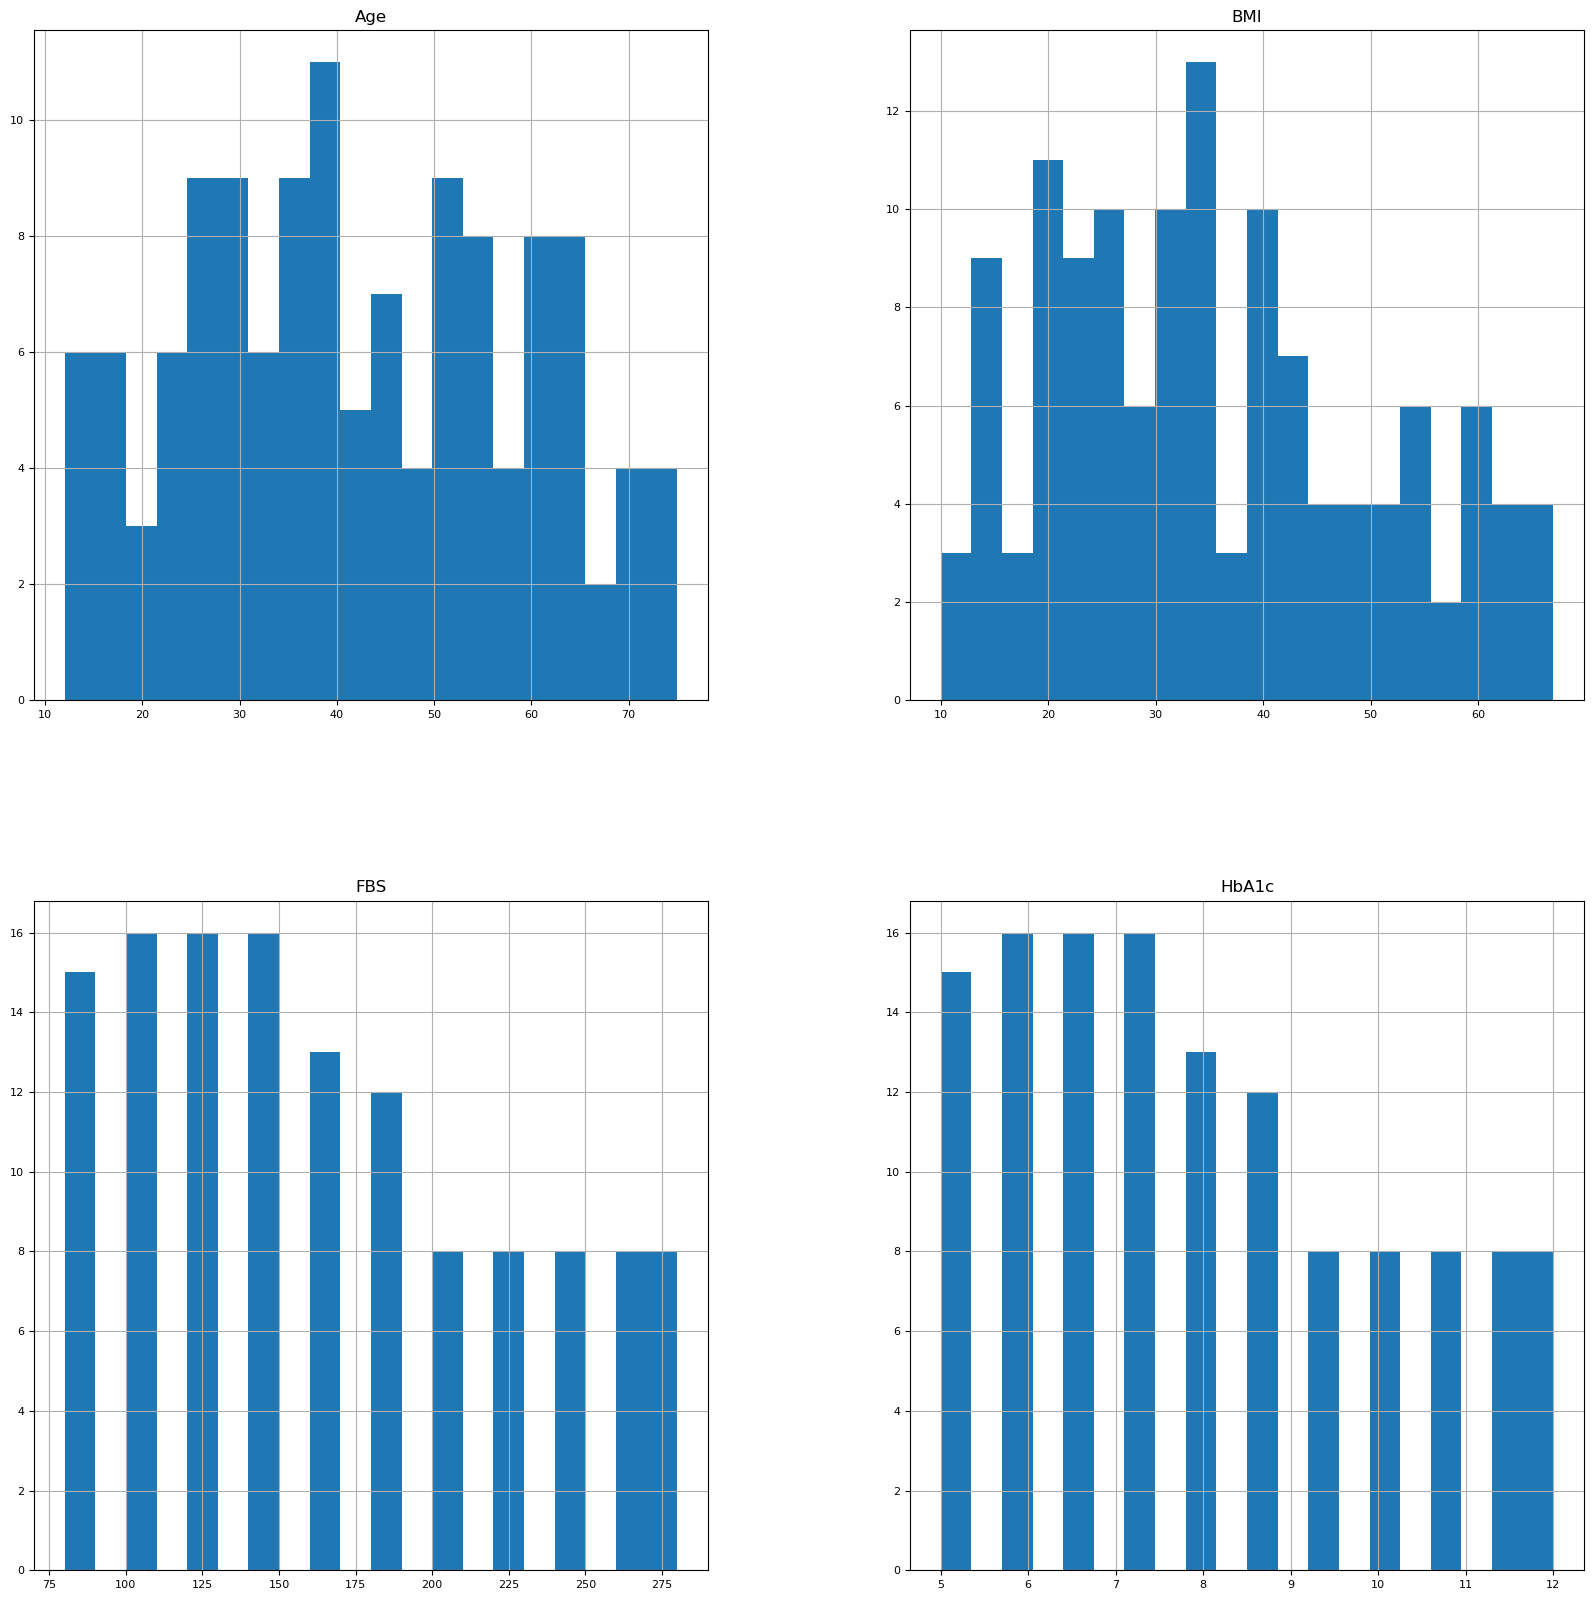

In [59]:
df.hist(figsize=(20,20),bins=20,xlabelsize=8,ylabelsize=8);

In [60]:
df_mean = np.mean(df)
df_mean

Age       42.031250
BMI       35.359375
FBS      162.500000
HbA1c      7.887500
dtype: float64

In [61]:
df_std = np.std(df)
df_std

Age      16.718224
BMI      14.923102
FBS      61.083959
HbA1c     2.137939
dtype: float64

In [62]:
upper = df_mean['Age']+df_std['Age']*1.5
lower = df_mean['Age']-df_std['Age']*1.5
outliers = [x for x in df['Age'] if x < lower or x > upper]
len(outliers)

16

In [63]:
inliers = [x for x in df['Age'] if x not in outliers]
len(inliers)

112

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
le = LabelEncoder()

In [69]:
for i in cat:
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [71]:
cat = df.select_dtypes(include = 'object').columns.tolist()

In [72]:
cat

[]

In [73]:
X = df.drop('Diagnosis', axis = 1)
y = df['Diagnosis']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [75]:
lr = LogisticRegression()

In [76]:
lr.fit(X_train,y_train)

LogisticRegression()

In [77]:
y_pred = lr.predict(X_test)

In [79]:
print(confusion_matrix(y_test, y_pred))

[[17  1]
 [ 1  7]]


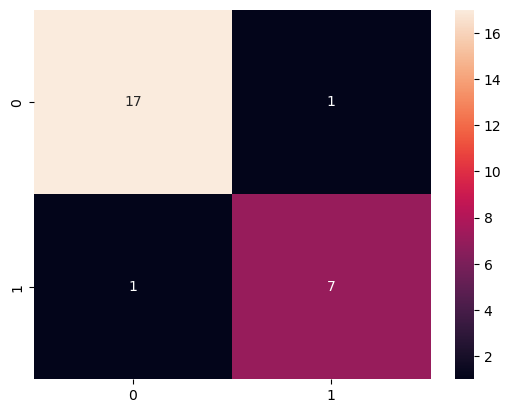

In [80]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax);

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.88      0.88      0.88         8

    accuracy                           0.92        26
   macro avg       0.91      0.91      0.91        26
weighted avg       0.92      0.92      0.92        26

